# Relative cost of matrix operations

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.linalg as sla
%matplotlib inline


from time import time

In [2]:
n_values = (10**np.linspace(1, 4, 15)).astype(np.int32)
n_values

array([   10,    16,    26,    43,    71,   117,   193,   316,   517,
         848,  1389,  2275,  3727,  6105, 10000], dtype=int32)

In [3]:
times_matmul = []
times_lu = []

for n in n_values:
    print(n)
    A = np.random.randn(n, n)
    start_time = time()
    A.dot(A)
    times_matmul.append(time() - start_time)
    start_time = time()
    la.lu(A)
    times_lu.append(time() - start_time)

10
16
26
43
71
117
193
316
517
848
1389
2275
3727
6105
10000


Text(0, 0.5, 'Wall time [s]')

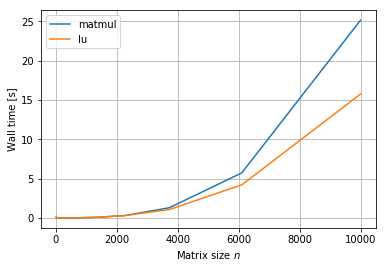

In [4]:
plt.plot(n_values, times_matmul, label='matmul')
plt.plot(n_values, times_lu, label='lu')
plt.grid()
plt.legend(loc="best")
plt.xlabel("Matrix size $n$")
plt.ylabel("Wall time [s]")

* The faster algorithms make the slower ones look bad. But... it's all relative.
* Can we get a better plot?
* Can we see the asymptotic cost ($O(n^3)$) of these algorithms from the plot?

In [ ]:
plt.loglog(n_values, times_matmul, label='matmul')
plt.loglog(n_values, times_lu, label='lu')
plt.grid()
plt.legend(loc="best")
plt.xlabel("Matrix size $n$")
plt.ylabel("Wall time [s]")

# Conditioning of $2\times2$ matrices

This mini-demo gives you the opportunity to play around with the 2-norm condition number of a $2\times 2$ matrix. 

* What happens if you choose the columns of the matrix to be nearly linearly dependent?
* What happens if you choose the diagonal entries to be very different in magnitude?

In [1]:
import numpy as np
import numpy.linalg as la

In [3]:
la.cond([
         [0.000001, 0.1],
         [0,  1]
         ], 2)

1010000.0000000097

In [ ]:
import numpy as np
import scipy.linalg as sla
import scipy.sparse as sparse

import matplotlib.pyplot as plt
%matplotlib inline

# Topology design optimization

![](myfigure.png)

When performing optimization of structural problem, for example to obtain the bridge design above, you may want to use a numerical method called Finite Element Method. The optimization will consist of a series of `solve` of the form:
$$ {\bf K} {\bf u} = {\bf F} $$

Here will load the matrix $ {\bf K}$ from a file. The matrix is given in Compressed Sparse Column (CSC) format.

In [ ]:
K = sparse.load_npz('yourmatrix.npz')
K

In [ ]:
K.shape[0]**2/105912

We can `spy` the distribution of the non-zero entries of the matrix:

In [ ]:
plt.spy(K)
plt.show()

The matrix ${\bf K}$ has a banded format, and it is also symmetric and positive definite. 

In [ ]:
Kdense = K.todense()

In [ ]:
np.max(Kdense-Kdense.T)

In [ ]:
sla.norm(Kdense-Kdense.T)

Solving the linear system of equations using different methods:

In [ ]:
F = np.zeros(K.shape[0])
F[1]=-1

### LU factorization

In [ ]:
u1 = sla.solve(Kdense,F)
u1.shape

In [ ]:
%timeit sla.solve(Kdense,F)

In [ ]:
lu,p = sla.lu_factor(Kdense)
u2 = sla.lu_solve((lu,p),F)
u2.shape

In [ ]:
%timeit sla.lu_factor(Kdense)
%timeit sla.lu_solve((lu,p),F)

### Cholesky factorization

In [ ]:
Kcho = sla.cholesky(Kdense)
u3 = sla.cho_solve((Kcho,False),F)
u3.shape

In [ ]:
%timeit sla.cholesky(Kdense)
%timeit sla.cho_solve((Kcho,False),F)

### Sparse solve

In [ ]:
from scipy.sparse.linalg import spsolve

In [ ]:
u4 = spsolve(K,F)
u4.shape

In [ ]:
%timeit spsolve(K,F)

# Hilbert Matrix - Condition Number

In [1]:
import numpy.linalg as la
import numpy as np

In [2]:
ndim = np.array([2,3,8,11,14])

Let's perform linear solves for matrices with increasing size "n", for a problem in which we know what the solution would be.

In [4]:
for nd in ndim:
    ## This is the vector 'x' that we want to obtain (the exact one)
    x = np.ones(nd)
    ## Create a matrix with random values between 0 and 1
    A = np.random.rand(nd,nd)
    ## We compute the matrix-vector multiplication 
    ## to find the right-hand side b
    b = A @ x
    ## We now use the linear algebra pack to compute Ax = b and solve for x
    x_solve = la.solve(A,b)
    ## What do we expect? 
    print("------ N =", nd, "----------")
    error = x_solve-x
    print("Norm of error = ", la.norm(error,2)) 

------ N = 2 ----------
Norm of error =  0.0
------ N = 3 ----------
Norm of error =  1.1957467920563633e-15
------ N = 8 ----------
Norm of error =  2.1339110374783316e-14
------ N = 11 ----------
Norm of error =  3.7696281795943905e-14
------ N = 14 ----------
Norm of error =  2.0764138859057344e-14


In [6]:
print(x_solve)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Now we will perform the same computation, but for a special matrix, known as the Hilbert matrix

In [8]:
def Hilbert(n):
    
    H = np.zeros((n, n))    
    for i in range(n):        
        for j in range(n):        
            H[i,j] = 1.0/(j+i+1)    
    return H

In [9]:
for nd in ndim:
    ## This is the vector 'x' that we want to obtain (the exact one)
    x = np.ones(nd)
    ## Create the Hilbert matrix
    A = Hilbert(nd)
    ## We compute the matrix-vector multiplication 
    ## to find the right-hand side b
    b = A @ x
    
    ## We now use the linear algebra pack to compute Ax = b and solve for x
    x_solve = la.solve(A,b)
    ## What do we expect? 
    print("------ N =", nd, "----------")
    error = x_solve-x
    print("Norm of error = ", la.norm(error,2)) 

------ N = 2 ----------
Norm of error =  8.005932084973442e-16
------ N = 3 ----------
Norm of error =  1.389554002205336e-14
------ N = 8 ----------
Norm of error =  5.035065902200173e-07
------ N = 11 ----------
Norm of error =  0.019591809632407014
------ N = 14 ----------
Norm of error =  6.999747915358066


In [10]:
print(x_solve)

[ 0.99999985  1.00002076  0.99927926  1.01069926  0.91619132  1.38032247
 -0.02036746  2.47417863  0.56641165 -1.35352445  5.55922945 -2.98137159
  2.77700163  0.67192909]


### What went wrong?

## Condition number

The solution to this linear system is extremely sensitive to small changes in the matrix entries and the right-hand side entries. What is the condition number of the Hilbert matrix?

In [11]:
for nd in ndim:
    ## This is the vector 'x' that we want to obtain (the exact one)
    x = np.ones(nd)
    ## Create the Hilbert matrix
    A = Hilbert(nd)
    ## We compute the matrix-vector multiplication 
    ## to find the right-hand side b
    b = A @ x
    ## We now use the linear algebra pack to compute Ax = b and solve for x
    x_solve = la.solve(A,b)
    ## What do we expect? 
    print("------ N =", nd, "----------")
    error = x_solve-x
    print("Norm of error = ", la.norm(error,2)) 
    print("Condition number = ", la.cond(A,2))

------ N = 2 ----------
Norm of error =  8.005932084973442e-16
Condition number =  19.281470067903975
------ N = 3 ----------
Norm of error =  1.389554002205336e-14
Condition number =  524.0567775860629
------ N = 8 ----------
Norm of error =  5.035065902200173e-07
Condition number =  15257574847.190956
------ N = 11 ----------
Norm of error =  0.019591809632407014
Condition number =  521712392909565.75
------ N = 14 ----------
Norm of error =  6.999747915358066
Condition number =  6.980917584970002e+17


## Residual

In [ ]:
for nd in ndim:
    ## This is the vector 'x' that we want to obtain (the exact one)
    x = np.ones(nd)
    ## Create the Hilbert matrix
    A = Hilbert(nd)
    ## We compute the matrix-vector multiplication 
    ## to find the right-hand side b
    b = A @ x
    ## We now use the linear algebra pack to compute Ax = b and solve for x
    x_solve = la.solve(A,b)
    ## What do we expect? 
    print("------ N =", nd, "----------")
    error = x_solve-x
    residual = A@x_solve - b
    print("Error norm = ", la.norm(error,2)) 
    print("Residual norm = ", la.norm(residual,2)) 
    print("Condition number = ", la.cond(A,2))

In [ ]:
x_solve

## Rule of thumb

In [ ]:
for nd in ndim:
    ## This is the vector 'x' that we want to obtain (the exact one)
    x = np.ones(nd)
    ## Create the Hilbert matrix
    A = Hilbert(nd)
    ## We compute the matrix-vector multiplication 
    ## to find the right-hand side b
    b = A @ x
    ## We now use the linear algebra pack to compute Ax = b and solve for x
    x_solve = la.solve(A,b)
    ## What do we expect? 
    print("------ N =", nd, "----------")
    error = x_solve-x
    residual = A@x_solve - b
    print("Error norm = ", la.norm(error,2)) 
    print("|dx| < ", la.norm(x)*la.cond(A,2)*10**(-16))
    print("Condition number = ", la.cond(A,2))

In [1]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla

In [2]:
def lu1(A):
    """
    """
    LU = A.copy()
    
    n = A.shape[0]
    for i in range(1,n):
        l_21 = LU[i:,i-1]
        u_12 = LU[i-1,i:]
        A_22 = LU[i:,i:]
        u_11 = LU[i-1,i-1]
        
        # l_{21} = a_{21} / u_{11}
        l_21 /= u_11
        # A_{22} = LU[] 
        A_22 += -np.outer(l_21, u_12)
        
    return LU

# Try this
$$
Ax = \begin{bmatrix}c&1\\-1&1\end{bmatrix}\begin{bmatrix}x_1\\x_2\end{bmatrix}
=
\begin{bmatrix}b_1\\b_2\end{bmatrix}
$$
with an exact solution of
$$
x_{exact} = \begin{bmatrix}1\\1\end{bmatrix}
$$

In [10]:
c = 1e-1
A = np.array([[c, 1.], [-1, 1]])
# xx is the exact solution
xx = np.array([1,1])
b = A.dot(xx)

# Comput the LU
LU = lu1(A)
L = np.tril(LU,-1) + np.eye(2,2)
U = np.triu(LU)

# Solve
# x is the numerical (xhat)
y = sla.solve_triangular(L, b, lower=True)
x = sla.solve_triangular(U, y)


print("Condition number = ", la.cond(A,2))

print("Exact solution = ", xx)

print("Computed solution = ",x)

print("Error = ", la.norm(xx-x))


Condition number =  2.618033988749895
Exact solution =  [1 1]
Computed solution =  [1. 1.]
Error =  0.0


## Iclicker

In [ ]:
#Is the matrix A singular
# A) YES
# B) NO

In [9]:
la.inv(A)

array([[ 1.e+00, -1.e+00],
       [ 1.e+00,  1.e-16]])

## Residual

In [ ]:
c = 1e-1
A = np.array([[c, 1.], [-1, 1]])
xx = np.array([1,1])
b = A.dot(xx)

# Comput the LU
LU = lu1(A)
L = np.tril(LU,-1) + np.eye(2,2)
U = np.triu(LU)

# Solve
y = sla.solve_triangular(L, b, lower=True)
x = sla.solve_triangular(U, y)


print("Exact solution = ", xx)

print("Computed solution = ",x)

print("Condition number = ", la.cond(A,2))

print("Residual norm = ",la.norm(A@x - b))

print("Error norm = ",la.norm(xx - x))

# Rule of Thumb on Conditioning

In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# print(plt.style.available) # uncomment to print all styles
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (8,6.0)
%matplotlib inline

### Let's make a matrix

Make the second column nearly linearly indepent to the first

In [2]:
n = 10
A = np.random.rand(n,n)

delta = 1e-16

A[:,1] = A[:,0] + delta*A[:,1]
print("cond = %g" % np.linalg.cond(A))

cond = 9.03293e+19


### Make a problem we know the answer to:

Let $x={\bf 1}$, then $x$ solves the problem
$$
A x = b
$$
where $b = A {\bf 1}$.

In [7]:
# This is the exact solution
xexact = np.ones((n,))
b = A.dot(x)

In [8]:
# This is the approximated solution
xnum = np.linalg.solve(A, b)

Since we are solving with LU with partial pivoting, the residual should be small!

## Residual Versus Error
$$
r = b - A x
$$
whereas
$$
e = x_{exact} - x
$$

In [9]:
xexact

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
xnum

array([ 3.26271616, -1.26271616,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

In [11]:
r = b - A@xnum
e = xexact - xnum

In [12]:
print("norm of residual = ", la.norm(r))
print("norm of the error = ", la.norm(e))

norm of residual =  1.831026719408895e-15
norm of the error =  3.1999638874768443


The condition number of A is high (ill-conditioned problem), and hence the error bound is also high.

## Let's do a test

We'll do the following steps
1. Make a matrix $A$
2. Find it's smallest eigenvalue $\lambda$, then $A - \lambda I$ would be singular
3. Instead, let's make B = $A - \lambda \cdot c\cdot I$ where c is a parameter in $[0,1]$.  This will make the problem closer and closer to singular.
4. Plot the condition number versus the error.

In [13]:
n = 10
A = np.random.rand(n,n)
A = A.dot(A.T)  # make it symmetric
v, _ = np.linalg.eig(A)
lmbda = np.min(np.abs(v))
I = np.eye(n,n)
print(lmbda)
print(np.linalg.cond(A - lmbda*I))

0.010913075244532172
1.6641458668456106e+17


In [14]:
x = np.ones((n,))
b = A.dot(x)

cond = []
error = []
clist = 1.0-1.0/np.logspace(0,15,int(100))
clist.sort()
for c in clist:
    B = A - lmbda * c * I
    xnum = np.linalg.solve(B, b)
    cond.append(np.linalg.cond(B))
    error.append(np.linalg.norm(x-xnum))

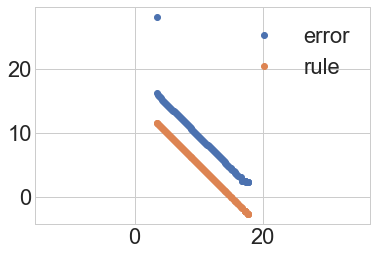

In [15]:
plt.plot(np.log10(cond),15-np.log10(error), 'o', label='error')
plt.plot(np.log10(cond),15-np.log10(cond), 'o', label='rule')
plt.axis('equal')
plt.legend()

In [20]:
import random
lambda1 = random.randint(3,12)
while 1:
    lambda2 = random.randint(5,20)
    if lambda2 != lambda1:
        break

A = np.array([[lambda1,0],[random.randint(-4,4),lambda2]])

In [21]:
A

array([[ 7,  0],
       [-3, 19]])

# Image Blur

# Inverting image operations

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')

from scipy import sparse

## Import an image of a Social Security Number

In [2]:
from PIL import Image
img = Image.open('ssn.png')
xmat = (255 - np.asarray(img).max(axis=2))/255
print(xmat.shape)
print(xmat.min(),xmat.max())

(40, 100)
0.0 1.0


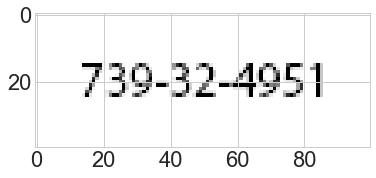

In [3]:
plt.imshow(xmat);

## "Vectorize" the image, creating the 1d array `x`

In [4]:
x = xmat.flatten()
x.shape

(4000,)

## Construct a "blur" matrix
More about this blur matrix on a later MP...

In [5]:
imat, jmat = np.meshgrid(np.arange(xmat.shape[0]), np.arange(xmat.shape[1]), indexing='ij')

ivec = np.atleast_2d(imat.flatten())
jvec = np.atleast_2d(jmat.flatten())

A = np.fmax(0, 1 - np.sqrt((ivec.T - ivec)**2 + (jvec.T - jvec)**2)/5)
A /= A.sum(axis=1)

## Compute b = A x

In [6]:
b = A @ x

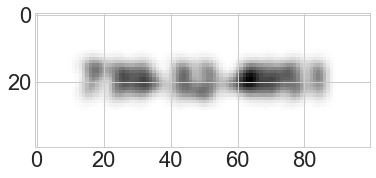

In [7]:
b2D=b.reshape(xmat.shape)
plt.imshow(b2D)

## Assume we have the blurred image, solve for the unblurred one

### Let's first get the LU factorization

In [9]:
import scipy.linalg as sla
P, L, U = sla.lu(A)

### What about "Solving"?

If $Ax = P L U x = b$, then there are two steps:
1. $y \leftarrow \text{solve}\,\, L y = P^Tb$
2. $x \leftarrow \text{solve}\,\, U x = y$

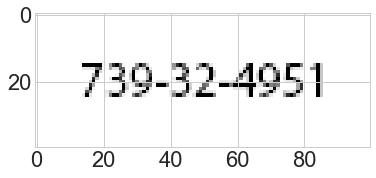

In [10]:
y = sla.solve_triangular(L, np.dot(P.T, b), lower=True)
x_solve = sla.solve_triangular(U, y)

plt.imshow(x_solve.reshape(xmat.shape))

### Why not just `np.linalg.solve`?

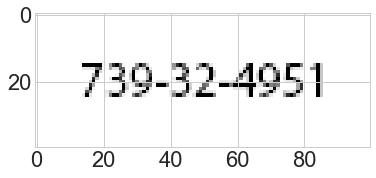

In [11]:
x_solve_2 = la.solve(A,b)
plt.imshow(x_solve_2.reshape(xmat.shape))

Suppose you have many social security numbers to un-blur. You should factorize your blur matrix only once and then perform several triangular solves.

Let's time:

1. solve including factorization
2. factorization
3. solve, given a factorization

In [12]:
%timeit sla.solve(A, b)

872 ms ± 5.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit P, L, U = sla.lu(A)

1 s ± 23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit sla.solve_triangular(U, y)

25.2 ms ± 316 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Let's take a look at the matrix format

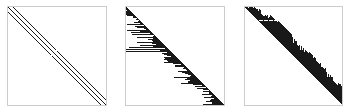

In [15]:
plt.figure()
plt.subplot(131)
plt.spy(A); plt.xticks([]); plt.yticks([]);

plt.subplot(132)
plt.spy(L); plt.xticks([]); plt.yticks([]);

plt.subplot(133)
plt.spy(U); plt.xticks([]); plt.yticks([]);

In [16]:
 A_csr = sparse.csr_matrix(A)

In [17]:
%timeit sparse.linalg.spsolve(A_csr,b)

380 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


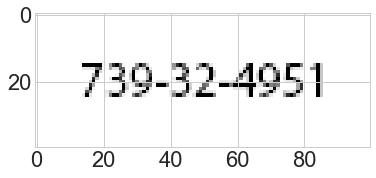

In [18]:
x_solve_3 = sparse.linalg.spsolve(A_csr,b)
plt.imshow(x_solve_3.reshape(xmat.shape))

# Now add some noise

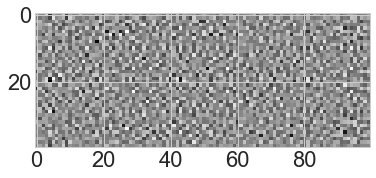

In [24]:
b_noisy = b + 1e-2 * np.random.rand(b.size)

y = sla.solve_triangular(L, np.dot(P.T, b_noisy), lower=True)
x_solve = sla.solve_triangular(U, y)

plt.imshow(x_solve.reshape(xmat.shape))


# Pivoting Example

In [ ]:
import numpy as np
import scipy.linalg as sla



# Let's try an example


In [ ]:
A = np.array([
    [2,1,1,0],
    [4,3,3,1],
    [8,7,9,5],
    [6,7,9,8]
])
np.set_printoptions(precision=2, suppress=True)
print(A)

In [ ]:
P, L, U = sla.lu(A)

In [ ]:
print(P.T)
print(L)
print(U)

In [ ]:
print(np.dot(P.T, A))

In [ ]:
print(np.dot(L, U))

In [ ]:
import numpy as np
import scipy.linalg as sla
import scipy.sparse as sparse

import matplotlib.pyplot as plt
%matplotlib inline

# Topology design optimization

![](myfigure.png)

When performing optimization of structural problem, for example to obtain the bridge design above, you may want to use a numerical method called Finite Element Method. The optimization will consist of a series of `solve` of the form:
$$ {\bf K} {\bf u} = {\bf F} $$

Here will load the matrix $ {\bf K}$ from a file. The matrix is given in Compressed Sparse Column (CSC) format.

In [ ]:
K = sparse.load_npz('yourmatrix.npz')
K

In [ ]:
K.shape[0]**2/105912

We can `spy` the distribution of the non-zero entries of the matrix:

In [ ]:
plt.spy(K)
plt.show()

The matrix ${\bf K}$ has a banded format, and it is also symmetric and positive definite. 

In [ ]:
Kdense = K.todense()

In [ ]:
np.max(Kdense-Kdense.T)

In [ ]:
sla.norm(Kdense-Kdense.T)

Solving the linear system of equations using different methods:

In [ ]:
F = np.zeros(K.shape[0])
F[1]=-1

### LU factorization

In [ ]:
u1 = sla.solve(Kdense,F)
u1.shape

In [ ]:
%timeit sla.solve(Kdense,F)

In [ ]:
lu,p = sla.lu_factor(Kdense)
u2 = sla.lu_solve((lu,p),F)
u2.shape

In [ ]:
%timeit sla.lu_factor(Kdense)
%timeit sla.lu_solve((lu,p),F)

### Cholesky factorization

In [ ]:
Kcho = sla.cholesky(Kdense)
u3 = sla.cho_solve((Kcho,False),F)
u3.shape

In [ ]:
%timeit sla.cholesky(Kdense)
%timeit sla.cho_solve((Kcho,False),F)

### Sparse solve

In [ ]:
from scipy.sparse.linalg import spsolve

In [ ]:
u4 = spsolve(K,F)
u4.shape

In [ ]:
%timeit spsolve(K,F)

# Hilbert Matrix - Condition Number

In [1]:
import numpy.linalg as la
import numpy as np

In [2]:
ndim = np.array([2,3,8,11,14])

Let's perform linear solves for matrices with increasing size "n", for a problem in which we know what the solution would be.

In [4]:
for nd in ndim:
    ## This is the vector 'x' that we want to obtain (the exact one)
    x = np.ones(nd)
    ## Create a matrix with random values between 0 and 1
    A = np.random.rand(nd,nd)
    ## We compute the matrix-vector multiplication 
    ## to find the right-hand side b
    b = A @ x
    ## We now use the linear algebra pack to compute Ax = b and solve for x
    x_solve = la.solve(A,b)
    ## What do we expect? 
    print("------ N =", nd, "----------")
    error = x_solve-x
    print("Norm of error = ", la.norm(error,2)) 

------ N = 2 ----------
Norm of error =  0.0
------ N = 3 ----------
Norm of error =  1.1957467920563633e-15
------ N = 8 ----------
Norm of error =  2.1339110374783316e-14
------ N = 11 ----------
Norm of error =  3.7696281795943905e-14
------ N = 14 ----------
Norm of error =  2.0764138859057344e-14


In [6]:
print(x_solve)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Now we will perform the same computation, but for a special matrix, known as the Hilbert matrix

In [8]:
def Hilbert(n):
    
    H = np.zeros((n, n))    
    for i in range(n):        
        for j in range(n):        
            H[i,j] = 1.0/(j+i+1)    
    return H

In [9]:
for nd in ndim:
    ## This is the vector 'x' that we want to obtain (the exact one)
    x = np.ones(nd)
    ## Create the Hilbert matrix
    A = Hilbert(nd)
    ## We compute the matrix-vector multiplication 
    ## to find the right-hand side b
    b = A @ x
    
    ## We now use the linear algebra pack to compute Ax = b and solve for x
    x_solve = la.solve(A,b)
    ## What do we expect? 
    print("------ N =", nd, "----------")
    error = x_solve-x
    print("Norm of error = ", la.norm(error,2)) 

------ N = 2 ----------
Norm of error =  8.005932084973442e-16
------ N = 3 ----------
Norm of error =  1.389554002205336e-14
------ N = 8 ----------
Norm of error =  5.035065902200173e-07
------ N = 11 ----------
Norm of error =  0.019591809632407014
------ N = 14 ----------
Norm of error =  6.999747915358066


In [10]:
print(x_solve)

[ 0.99999985  1.00002076  0.99927926  1.01069926  0.91619132  1.38032247
 -0.02036746  2.47417863  0.56641165 -1.35352445  5.55922945 -2.98137159
  2.77700163  0.67192909]


### What went wrong?

## Condition number

The solution to this linear system is extremely sensitive to small changes in the matrix entries and the right-hand side entries. What is the condition number of the Hilbert matrix?

In [11]:
for nd in ndim:
    ## This is the vector 'x' that we want to obtain (the exact one)
    x = np.ones(nd)
    ## Create the Hilbert matrix
    A = Hilbert(nd)
    ## We compute the matrix-vector multiplication 
    ## to find the right-hand side b
    b = A @ x
    ## We now use the linear algebra pack to compute Ax = b and solve for x
    x_solve = la.solve(A,b)
    ## What do we expect? 
    print("------ N =", nd, "----------")
    error = x_solve-x
    print("Norm of error = ", la.norm(error,2)) 
    print("Condition number = ", la.cond(A,2))

------ N = 2 ----------
Norm of error =  8.005932084973442e-16
Condition number =  19.281470067903975
------ N = 3 ----------
Norm of error =  1.389554002205336e-14
Condition number =  524.0567775860629
------ N = 8 ----------
Norm of error =  5.035065902200173e-07
Condition number =  15257574847.190956
------ N = 11 ----------
Norm of error =  0.019591809632407014
Condition number =  521712392909565.75
------ N = 14 ----------
Norm of error =  6.999747915358066
Condition number =  6.980917584970002e+17


## Residual

In [ ]:
for nd in ndim:
    ## This is the vector 'x' that we want to obtain (the exact one)
    x = np.ones(nd)
    ## Create the Hilbert matrix
    A = Hilbert(nd)
    ## We compute the matrix-vector multiplication 
    ## to find the right-hand side b
    b = A @ x
    ## We now use the linear algebra pack to compute Ax = b and solve for x
    x_solve = la.solve(A,b)
    ## What do we expect? 
    print("------ N =", nd, "----------")
    error = x_solve-x
    residual = A@x_solve - b
    print("Error norm = ", la.norm(error,2)) 
    print("Residual norm = ", la.norm(residual,2)) 
    print("Condition number = ", la.cond(A,2))

In [ ]:
x_solve

## Rule of thumb

In [ ]:
for nd in ndim:
    ## This is the vector 'x' that we want to obtain (the exact one)
    x = np.ones(nd)
    ## Create the Hilbert matrix
    A = Hilbert(nd)
    ## We compute the matrix-vector multiplication 
    ## to find the right-hand side b
    b = A @ x
    ## We now use the linear algebra pack to compute Ax = b and solve for x
    x_solve = la.solve(A,b)
    ## What do we expect? 
    print("------ N =", nd, "----------")
    error = x_solve-x
    residual = A@x_solve - b
    print("Error norm = ", la.norm(error,2)) 
    print("|dx| < ", la.norm(x)*la.cond(A,2)*10**(-16))
    print("Condition number = ", la.cond(A,2))

# Rule of Thumb on Conditioning

In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# print(plt.style.available) # uncomment to print all styles
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (8,6.0)
%matplotlib inline

### Let's make a matrix

Make the second column nearly linearly indepent to the first

In [2]:
n = 10
A = np.random.rand(n,n)

delta = 1e-16

A[:,1] = A[:,0] + delta*A[:,1]
print("cond = %g" % np.linalg.cond(A))

cond = 9.03293e+19


### Make a problem we know the answer to:

Let $x={\bf 1}$, then $x$ solves the problem
$$
A x = b
$$
where $b = A {\bf 1}$.

In [7]:
# This is the exact solution
xexact = np.ones((n,))
b = A.dot(x)

In [8]:
# This is the approximated solution
xnum = np.linalg.solve(A, b)

Since we are solving with LU with partial pivoting, the residual should be small!

## Residual Versus Error
$$
r = b - A x
$$
whereas
$$
e = x_{exact} - x
$$

In [9]:
xexact

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
xnum

array([ 3.26271616, -1.26271616,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

In [11]:
r = b - A@xnum
e = xexact - xnum

In [12]:
print("norm of residual = ", la.norm(r))
print("norm of the error = ", la.norm(e))

norm of residual =  1.831026719408895e-15
norm of the error =  3.1999638874768443


The condition number of A is high (ill-conditioned problem), and hence the error bound is also high.

## Let's do a test

We'll do the following steps
1. Make a matrix $A$
2. Find it's smallest eigenvalue $\lambda$, then $A - \lambda I$ would be singular
3. Instead, let's make B = $A - \lambda \cdot c\cdot I$ where c is a parameter in $[0,1]$.  This will make the problem closer and closer to singular.
4. Plot the condition number versus the error.

In [13]:
n = 10
A = np.random.rand(n,n)
A = A.dot(A.T)  # make it symmetric
v, _ = np.linalg.eig(A)
lmbda = np.min(np.abs(v))
I = np.eye(n,n)
print(lmbda)
print(np.linalg.cond(A - lmbda*I))

0.010913075244532172
1.6641458668456106e+17


In [14]:
x = np.ones((n,))
b = A.dot(x)

cond = []
error = []
clist = 1.0-1.0/np.logspace(0,15,int(100))
clist.sort()
for c in clist:
    B = A - lmbda * c * I
    xnum = np.linalg.solve(B, b)
    cond.append(np.linalg.cond(B))
    error.append(np.linalg.norm(x-xnum))

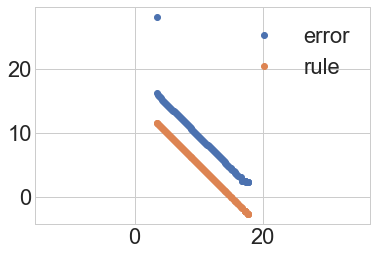

In [15]:
plt.plot(np.log10(cond),15-np.log10(error), 'o', label='error')
plt.plot(np.log10(cond),15-np.log10(cond), 'o', label='rule')
plt.axis('equal')
plt.legend()

In [20]:
import random
lambda1 = random.randint(3,12)
while 1:
    lambda2 = random.randint(5,20)
    if lambda2 != lambda1:
        break

A = np.array([[lambda1,0],[random.randint(-4,4),lambda2]])

In [21]:
A

array([[ 7,  0],
       [-3, 19]])

# Image Blur

# Inverting image operations

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')

from scipy import sparse

## Import an image of a Social Security Number

In [2]:
from PIL import Image
img = Image.open('ssn.png')
xmat = (255 - np.asarray(img).max(axis=2))/255
print(xmat.shape)
print(xmat.min(),xmat.max())

(40, 100)
0.0 1.0


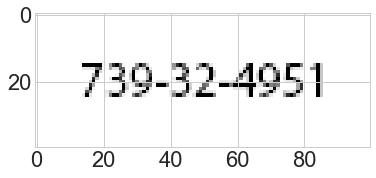

In [3]:
plt.imshow(xmat);

## "Vectorize" the image, creating the 1d array `x`

In [4]:
x = xmat.flatten()
x.shape

(4000,)

## Construct a "blur" matrix
More about this blur matrix on a later MP...

In [5]:
imat, jmat = np.meshgrid(np.arange(xmat.shape[0]), np.arange(xmat.shape[1]), indexing='ij')

ivec = np.atleast_2d(imat.flatten())
jvec = np.atleast_2d(jmat.flatten())

A = np.fmax(0, 1 - np.sqrt((ivec.T - ivec)**2 + (jvec.T - jvec)**2)/5)
A /= A.sum(axis=1)

## Compute b = A x

In [6]:
b = A @ x

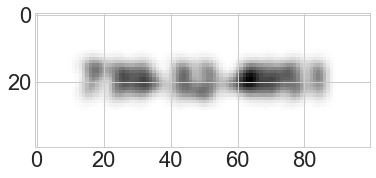

In [7]:
b2D=b.reshape(xmat.shape)
plt.imshow(b2D)

## Assume we have the blurred image, solve for the unblurred one

### Let's first get the LU factorization

In [9]:
import scipy.linalg as sla
P, L, U = sla.lu(A)

### What about "Solving"?

If $Ax = P L U x = b$, then there are two steps:
1. $y \leftarrow \text{solve}\,\, L y = P^Tb$
2. $x \leftarrow \text{solve}\,\, U x = y$

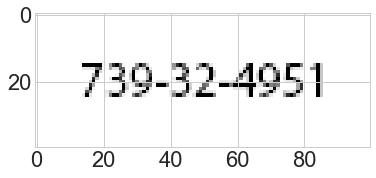

In [10]:
y = sla.solve_triangular(L, np.dot(P.T, b), lower=True)
x_solve = sla.solve_triangular(U, y)

plt.imshow(x_solve.reshape(xmat.shape))

### Why not just `np.linalg.solve`?

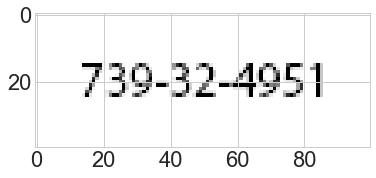

In [11]:
x_solve_2 = la.solve(A,b)
plt.imshow(x_solve_2.reshape(xmat.shape))

Suppose you have many social security numbers to un-blur. You should factorize your blur matrix only once and then perform several triangular solves.

Let's time:

1. solve including factorization
2. factorization
3. solve, given a factorization

In [12]:
%timeit sla.solve(A, b)

872 ms ± 5.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit P, L, U = sla.lu(A)

1 s ± 23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit sla.solve_triangular(U, y)

25.2 ms ± 316 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Let's take a look at the matrix format

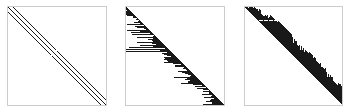

In [15]:
plt.figure()
plt.subplot(131)
plt.spy(A); plt.xticks([]); plt.yticks([]);

plt.subplot(132)
plt.spy(L); plt.xticks([]); plt.yticks([]);

plt.subplot(133)
plt.spy(U); plt.xticks([]); plt.yticks([]);

In [16]:
 A_csr = sparse.csr_matrix(A)

In [17]:
%timeit sparse.linalg.spsolve(A_csr,b)

380 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


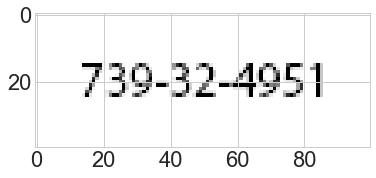

In [18]:
x_solve_3 = sparse.linalg.spsolve(A_csr,b)
plt.imshow(x_solve_3.reshape(xmat.shape))

# Now add some noise

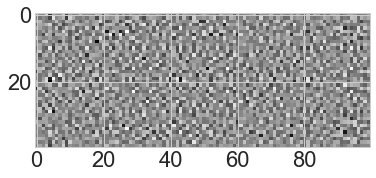

In [24]:
b_noisy = b + 1e-2 * np.random.rand(b.size)

y = sla.solve_triangular(L, np.dot(P.T, b_noisy), lower=True)
x_solve = sla.solve_triangular(U, y)

plt.imshow(x_solve.reshape(xmat.shape))


# Pivoting Example

In [ ]:
import numpy as np
import scipy.linalg as sla



# Let's try an example


In [ ]:
A = np.array([
    [2,1,1,0],
    [4,3,3,1],
    [8,7,9,5],
    [6,7,9,8]
])
np.set_printoptions(precision=2, suppress=True)
print(A)

In [ ]:
P, L, U = sla.lu(A)

In [ ]:
print(P.T)
print(L)
print(U)

In [ ]:
print(np.dot(P.T, A))

In [ ]:
print(np.dot(L, U))